<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_3/supervised_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'
# це налаштування в pandas, яке керує попередженням про "chained assignment" — тобто випадки,
# коли ти змінюєш значення в DataFrame у два кроки (ланцюжком),
# що може призвести до помилок або несподіваної поведінки.

# CSV

we will use the Kaggle Food Demand Forecasting data to demonstrate these major steps.
- Data https://kaggle.com/datasets/kannanaikkal/food-demand-forecasting/

In [ ]:
# Import data from kaggle competition
PATH = "./data/food_demand"
train_data = pd.read_csv(os.path.join(PATH, "train.csv"), index_col=0)
test_data = pd.read_csv(os.path.join(PATH, "test.csv"), index_col=0)

train_data.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
id,,,,,,,,
1379560,1,55,1885,136.83,152.29,0,0,177
1466964,1,55,1993,136.83,135.83,0,0,270
1346989,1,55,2539,134.86,135.86,0,0,189
1338232,1,55,2139,339.50,437.53,0,0,54
1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
train_data.tail()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
id,,,,,,,,
1271326,145,61,1543,484.09,484.09,0,0,68
1062036,145,61,2304,482.09,482.09,0,0,42
1110849,145,61,2664,237.68,321.07,0,0,501
1147725,145,61,2569,243.50,313.34,0,0,729
1361984,145,61,2490,292.03,290.03,0,0,162


In [ ]:
test_data.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
id,,,,,,,
1028232,146,55,1885,158.11,159.11,0,0
1127204,146,55,1993,160.11,159.11,0,0
1212707,146,55,2539,157.14,159.14,0,0
1082698,146,55,2631,162.02,162.02,0,0
1400926,146,55,1248,163.93,163.93,0,0


In [ ]:
meal_info_df = pd.read_csv(os.path.join(PATH, "meal_info.csv"), index_col=0)
meal_info_df = meal_info_df.reset_index(drop=False)
meal_info_df.tail()

,meal_id,category,cuisine
46,2956,Fish,Continental
47,2104,Fish,Continental
48,2444,Seafood,Continental
49,2867,Seafood,Continental
50,1445,Seafood,Continental


In [ ]:
meal_info_df[["category", "meal_id"]].groupby(["category"]).count()

,meal_id
category,
Beverages,12
Biryani,3
Desert,3
Extras,3
Fish,3
Other Snacks,3
Pasta,3
Pizza,3
Rice Bowl,3


In [ ]:
# train_data = train_data.merge(meal_info_df, on="meal_id", how="left")
# train_data

In [ ]:
# how="inner" — коли тебе цікавлять лише ті записи, які точно мають meal_id у meal_info_df.

# how="left" — коли ти не хочеш втратити жодного рядка з train_data, навіть якщо для деяких meal_id немає інформації.

# train_data = train_data.merge(meal_info_df, on="meal_id", how="inner")
train_data = train_data.merge(meal_info_df, on="meal_id", how="left")
train_data

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,484.09,0,0,68,Desert,Indian
456544,145,61,2304,482.09,482.09,0,0,42,Desert,Indian
456545,145,61,2664,237.68,321.07,0,0,501,Salad,Italian
456546,145,61,2569,243.50,313.34,0,0,729,Salad,Italian


In [ ]:
train_data[["category", "meal_id"]].groupby(["category"]).count().sort_values(by="meal_id", ascending=False)

,meal_id
category,
Beverages,127890
Rice Bowl,33408
Sandwich,33291
Pizza,33138
Starters,29941
Other Snacks,29379
Desert,29294
Salad,28559
Pasta,27694


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   456548 non-null  int64  
 1   center_id              456548 non-null  int64  
 2   meal_id                456548 non-null  int64  
 3   checkout_price         456548 non-null  float64
 4   base_price             456548 non-null  float64
 5   emailer_for_promotion  456548 non-null  int64  
 6   homepage_featured      456548 non-null  int64  
 7   num_orders             456548 non-null  int64  
 8   category               456548 non-null  object 
 9   cuisine                456548 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 34.8+ MB


🎯 Навіщо це потрібно:
Це корисна перевірка для виявлення дублікатів:

Наприклад, якщо модель тренується на тижневих замовленнях і передбачається, що кожен meal_id має лише один запис на тиждень, тоді дублікати — це проблема.

Це може вказувати на помилки у даних або специфіку бізнес-логіки (наприклад, одна страва була замовлена кілька разів у тиждень різними клієнтами — тоді треба агрегацію).

In [ ]:
for i in range(146):
    slice = train_data[train_data["week"] == i]
    length = len(slice)
    unique_ids = len(slice["meal_id"].unique())
    if length != unique_ids:
        print(f"Week {i} more than one entry per meal_id. {length}, {unique_ids }.")

Week 1 more than one entry per meal_id. 2922, 45.
Week 2 more than one entry per meal_id. 2896, 45.
Week 3 more than one entry per meal_id. 2899, 45.
Week 4 more than one entry per meal_id. 2889, 45.
Week 5 more than one entry per meal_id. 2859, 45.
Week 6 more than one entry per meal_id. 2846, 45.
Week 7 more than one entry per meal_id. 2795, 45.
Week 8 more than one entry per meal_id. 2786, 45.
Week 9 more than one entry per meal_id. 2854, 45.
Week 10 more than one entry per meal_id. 2859, 47.
Week 11 more than one entry per meal_id. 2863, 45.
Week 12 more than one entry per meal_id. 2831, 45.
Week 13 more than one entry per meal_id. 2838, 45.
Week 14 more than one entry per meal_id. 2830, 46.
Week 15 more than one entry per meal_id. 2868, 46.
Week 16 more than one entry per meal_id. 2850, 46.
Week 17 more than one entry per meal_id. 2888, 46.
Week 18 more than one entry per meal_id. 2962, 48.
Week 19 more than one entry per meal_id. 2939, 47.
Week 20 more than one entry per meal_id.

🧠 Навіщо це потрібно:
🔹 Щоб перевірити:

❓ Чи є дублікати — тобто, одна і та ж страва в одному і тому ж центрі з'являється кілька разів у тому самому тижні.

🔁 Якщо таке повторення є — можливо, потрібно агрегувати замовлення по meal_id та center_id на кожен тиждень (наприклад, сумувати кількість або доходи).

✅ Якщо кожна комбінація з’являється лише один раз, значить, дані вже в нормалізованій формі.

In [ ]:
train_data[train_data["week"] == 1][["meal_id", "center_id", "week"]].groupby(["meal_id", "center_id"]).count()


week
meal_id center_id      
1062    10            1
        11            1
        13            1
        14            1
        17            1
...                 ...
2867    145           1
        146           1
        152           1
        153           1
        174           1

[2922 rows x 1 columns]

✅ Результат:
True — є дублікати meal_id + center_id у тижні 1

False — всі комбінації унікальні (по одному запису кожна)

🔧 Корисно для перевірки цілісності даних перед побудовою моделей чи агрегацією.

In [ ]:
any(train_data[train_data["week"] == 1][["meal_id", "center_id", "week"]].groupby(["meal_id", "center_id"]).count()["week"] > 1)

False

In [ ]:
# перевірка цілісності даних: чи немає кількох рядків для однієї й тієї ж комбінації week + meal_id + center_id. Це критично для побудови якісної моделі.
# Перевірка наявності дублікатів

for i in range(146):
    slice = train_data[train_data["week"] == i]
    more_than_one = any(slice[["meal_id", "center_id", "week"]].groupby(["meal_id", "center_id"]).count()["week"] > 1)
    if more_than_one:
        print(f'Week {i} has more than one entry per meal_id')


In [ ]:
train_data

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,484.09,0,0,68,Desert,Indian
456544,145,61,2304,482.09,482.09,0,0,42,Desert,Indian
456545,145,61,2664,237.68,321.07,0,0,501,Salad,Italian
456546,145,61,2569,243.50,313.34,0,0,729,Salad,Italian


In [ ]:
# train-test-split by hand

df = train_data[:]
test_data = df[df["week"] ==145]
train_data = df[df["week"] != 145]

len(train_data), len(test_data)

(453280, 3268)

In [ ]:
# train-test-spli with sklearn

from sklearn.model_selection import train_test_split

df1, df2 = train_test_split(df, shuffle=False, test_size=len(test_data))
df1.tail(), df2.head()

(        week  center_id  meal_id  checkout_price  base_price  \
 453275   144         61     1543          483.09      483.09   
 453276   144         61     2304          483.09      483.09   
 453277   144         61     2664          243.47      321.07   
 453278   144         61     2569          246.41      314.34   
 453279   144         61     2490          290.03      292.03   
 
         emailer_for_promotion  homepage_featured  num_orders category  cuisine  
 453275                      0                  0         123   Desert   Indian  
 453276                      0                  0          13   Desert   Indian  
 453277                      1                  0         770    Salad  Italian  
 453278                      1                  0         811    Salad  Italian  
 453279                      0                  0         190    Salad  Italian  ,
         week  center_id  meal_id  checkout_price  base_price  \
 453280   145         55     1885          156.23 

In [ ]:
train_data

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...
453275,144,61,1543,483.09,483.09,0,0,123,Desert,Indian
453276,144,61,2304,483.09,483.09,0,0,13,Desert,Indian
453277,144,61,2664,243.47,321.07,1,0,770,Salad,Italian
453278,144,61,2569,246.41,314.34,1,0,811,Salad,Italian


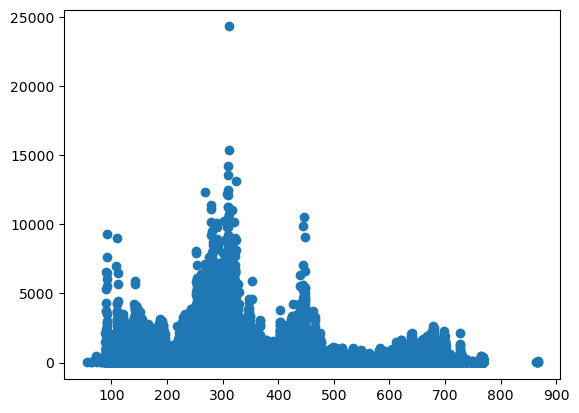

In [ ]:
plt.scatter(train_data["base_price"], train_data["num_orders"])

<Axes: xlabel='base_price', ylabel='num_orders'>

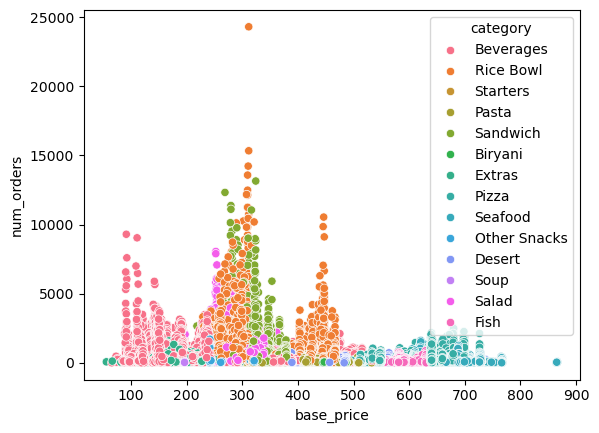

In [ ]:
sns.scatterplot(x="base_price", y="num_orders", data=train_data, hue="category")

<Axes: xlabel='base_price', ylabel='num_orders'>

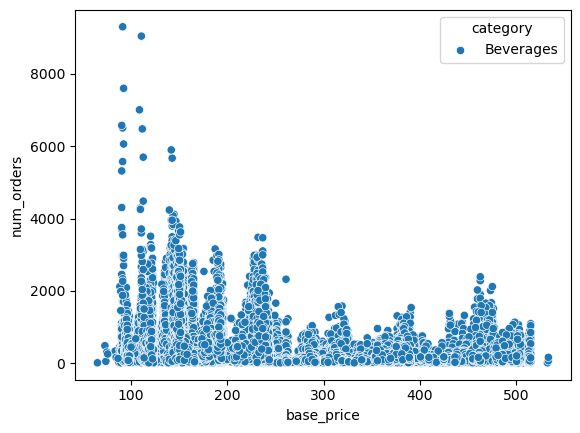

In [ ]:
sns.scatterplot(x="base_price", y="num_orders", data=train_data[train_data["category"]=="Beverages"], hue="category")

In [ ]:
train_data_beverages = train_data[train_data["category"] == "Beverages"]
test_data_beverages = test_data[test_data["category"] == "Beverages"]

In [ ]:
from sklearn.linear_model import LinearRegression

x = train_data_beverages["base_price"].to_numpy().reshape(-1, 1)
y = train_data_beverages["num_orders"].to_numpy()

model = LinearRegression().fit(x, y)

# reshape()
# -1 — каже NumPy: "сам порахуй, скільки рядків має бути (тобто скільки у мене значень)"

# 1 — ти хочеш одну колонку

# Якщо, наприклад, було б 784 значення, то .reshape(-1, 1) автоматично стане .reshape(784, 1)

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([-0.96807654]),
 'rank_': 1,
 'singular_': array([36934.4513233]),
 'intercept_': np.float64(536.5377173336849)}

In [ ]:
model.coef_, model.intercept_

(array([-0.96807654]), np.float64(536.5377173336849))

In [ ]:
train_data_beverages["predictions"] = model.predict(x)
train_data_beverages

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,predictions
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,389.109340
1,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,405.043880
2,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,405.014838
3,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,112.975187
4,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,301.779155
...,...,...,...,...,...,...,...,...,...,...,...
453245,144,61,1062,153.26,155.26,0,0,472,Beverages,Italian,386.234153
453246,144,61,2707,203.76,235.74,0,0,392,Beverages,Italian,308.323353
453247,144,61,1207,368.63,367.63,0,0,96,Beverages,Continental,180.643737
453248,144,61,1230,368.63,369.63,0,0,136,Beverages,Continental,178.707584


<Axes: xlabel='base_price', ylabel='num_orders'>

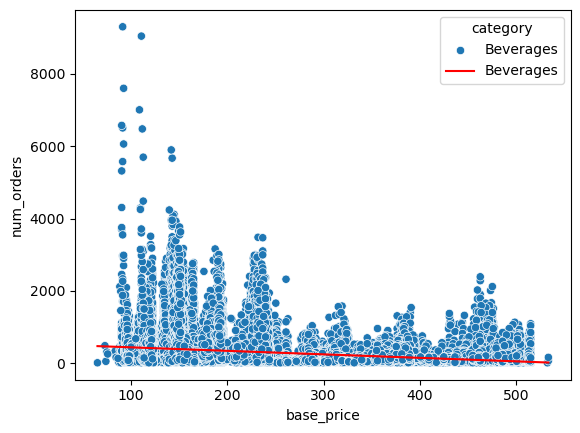

In [ ]:
sns.scatterplot(x="base_price", y="num_orders", data=train_data_beverages, hue="category")
sns.lineplot(data=train_data_beverages, x="base_price", y="predictions", hue="category", palette=['red'])

<Axes: xlabel='base_price', ylabel='num_orders'>

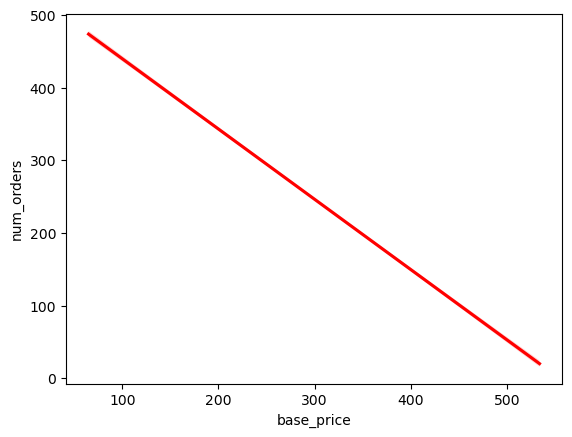

In [ ]:
sns.regplot(data=train_data_beverages, x="base_price", y="num_orders", scatter=False, color='red', line_kws={"label": "Predictions"})

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# y_hat = b+ax
# де:

# a — коефіцієнт (нахил) → model.coef_

# b — вільний член (intercept) → model.intercept_

# x — значення ознаки → x (наприклад, ціна)
# y_hat = model.intercept_ + model.coef_ * x_f  # або np.dot(x_f, model.coef_.T)

# mean_squared_error = np.sum((y -y_hat.T) ** 2) / len(y)

# mse_manual = np.sum((y - y_hat.T)**2) / len(y)

test_data_beverages["predictions"] = model.predict(test_data_beverages["base_price"].to_numpy().reshape(-1, 1))

# the mean squared error (MSE це міра того, наскільки близько підігнана лінія знаходиться до точок даних.
print("Mean squared error: %.2f"
      % mean_squared_error(test_data_beverages["num_orders"], test_data_beverages["predictions"]))
# R^2 (коефіцієнт детермінації) показує, яка частина варіації залежної змінної пояснюється незалежною змінною. 1 означає ідеальне пояснення, 0 — відсутність пояснення.
print('Coefficient of determination: %.2f'
      % r2_score(test_data_beverages["num_orders"], test_data_beverages["predictions"]))

Mean squared error: 96257.36
Coefficient of determination: 0.02


In [ ]:
x_f = np.array([[1], [2], [3]])
y_f = np.array([1, 2, 3])

model_f = LinearRegression().fit(x_f, y_f)
model_f.coef_ = np.array([1.0])
model_f.intercept_ = np.array([0.0])

In [ ]:
model_f.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([1.]),
 'rank_': 1,
 'singular_': array([1.41421356]),
 'intercept_': array([0.])}

In [ ]:
x_f = np.array([[1], [2], [3]])
y_hat = model_f.intercept_ + model_f.coef_ * x_f  # або np.dot(x_f, model_f.coef_.T)

In [ ]:
y_hat

array([[1.],
       [2.],
       [3.]])

In [ ]:
mean_squared_error_manual = np.sum((y_f - y_hat.T)**2) / len(y_f)
print("Mean squared error (manual): %.2f" % mean_squared_error_manual)

Mean squared error (manual): 0.00


<Axes: xlabel='base_price', ylabel='num_orders'>

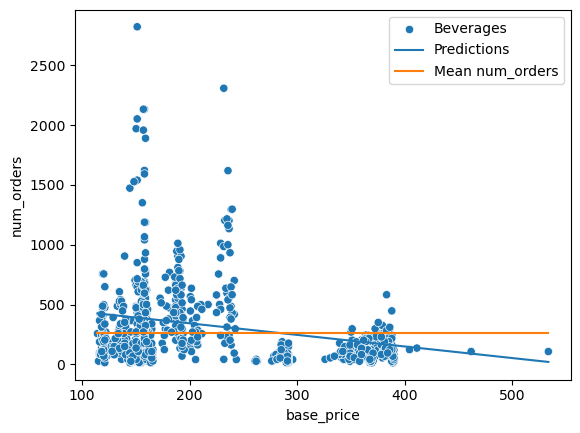

In [ ]:
sns.scatterplot(x='base_price', y='num_orders', data=test_data_beverages, hue='category')
sns.lineplot(
    data=test_data_beverages,
    x="base_price",
    y="predictions",
    label="Predictions",
)
sns.lineplot(
    data=test_data_beverages,
    x="base_price",
    y=test_data_beverages["num_orders"].mean(),
    label="Mean num_orders",
)

In [ ]:
test_data_beverages["num_orders"].mean()

np.float64(262.08584169453735)

In [ ]:
mean = np.array(
    [
        [test_data_beverages["num_orders"].mean()]
        * len(test_data_beverages["num_orders"])
    ]
)
mean_squared_error(test_data_beverages["num_orders"], mean.reshape(-1, 1))

# 96257.36

97973.8176033328

In [ ]:
mean_value = test_data_beverages["num_orders"].mean()
mean_squared_error(
    test_data_beverages["num_orders"], [mean_value] * len(test_data_beverages)
)

97973.8176033328

In [ ]:
mean_value = test_data_beverages["num_orders"].mean()
mean_array = np.full((len(test_data_beverages), 1), mean_value)
mean_squared_error(test_data_beverages["num_orders"], mean_array)

97973.8176033328

In [ ]:
from copy import deepcopy

model_copy = deepcopy(model)
model_copy.coef_

array([-0.96807654])

In [ ]:
model_copy.coef_ = np.array([-0.99])

train_predictions_samples = train_data_beverages[["base_price", "num_orders", "predictions"]]
train_predictions_samples["exp_best"] = train_data_beverages["predictions"]
train_predictions_samples["exp_0"] = model_copy.predict(x)
train_predictions_samples

,base_price,num_orders,predictions,exp_best,exp_0
0,152.29,177,389.109340,389.109340,385.770617
1,135.83,270,405.043880,405.043880,402.066017
2,135.86,189,405.014838,405.014838,402.036317
3,437.53,54,112.975187,112.975187,103.383017
4,242.50,40,301.779155,301.779155,296.462717
...,...,...,...,...,...
453245,155.26,472,386.234153,386.234153,382.830317
453246,235.74,392,308.323353,308.323353,303.155117
453247,367.63,96,180.643737,180.643737,172.584017
453248,369.63,136,178.707584,178.707584,170.604017


<Axes: xlabel='base_price', ylabel='value'>

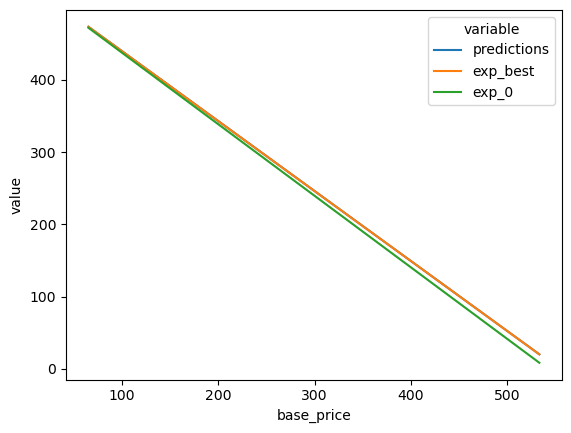

In [ ]:
sns.lineplot(x='base_price', y='value', hue='variable', data=pd.melt(train_predictions_samples.drop(["num_orders"], axis=1), ['base_price']))

In [ ]:
pd.melt(train_predictions_samples, ['base_price'])
# функція, яка перетворює DataFrame з "широкого" формату у "довгий", залишаючи 'base_price' як фіксовану колонку, а інші — як змінні.

,base_price,variable,value
0,152.29,num_orders,177.000000
1,135.83,num_orders,270.000000
2,135.86,num_orders,189.000000
3,437.53,num_orders,54.000000
4,242.50,num_orders,40.000000
...,...,...,...
507967,155.26,exp_0,382.830317
507968,235.74,exp_0,303.155117
507969,367.63,exp_0,172.584017
507970,369.63,exp_0,170.604017


In [ ]:
coefs = [-4.2, -2.3, -1.7, -0.99, -0.98, -0.97, -0.84, -0.64, -0.5, -0.2, 0.01, 0.2, 0.45, 0.76, 0.99, 1.7, 2.3 ]

x_test = test_data_beverages["base_price"].to_numpy().reshape(-1, 1)
test_predictions_samples = test_data_beverages[["base_price", "num_orders"]]

models = []
for coef in coefs:
    new_model = deepcopy(model)
    new_model.coef_ = np.array([coef])
    models.append(new_model)

for i in range(len(models)):
    test_predictions_samples[f"exp_{i}"] = models[i].predict(x_test)


In [ ]:
test_predictions_samples

,base_price,num_orders,exp_0,exp_1,exp_2,exp_3,exp_4,exp_5,exp_6,exp_7,exp_8,exp_9,exp_10,exp_11,exp_12,exp_13,exp_14,exp_15,exp_16
453280,156.23,121,-119.628283,177.208717,270.946717,381.870017,383.432317,384.994617,405.304517,436.550517,458.422717,505.291717,538.100017,567.783717,606.841217,655.272517,691.205417,802.128717,895.866717
453281,158.14,54,-127.650283,172.815717,267.699717,379.979117,381.560517,383.141917,403.700117,435.328117,457.467717,504.909717,538.119117,568.165717,607.700717,656.724117,693.096317,805.375717,900.259717
453282,160.11,135,-135.924283,168.284717,264.350717,378.028817,379.629917,381.231017,402.045317,434.067317,456.482717,504.515717,538.138817,568.559717,608.587217,658.221317,695.046617,808.724717,904.790717
453283,292.03,15,-689.988283,-135.131283,40.086717,247.428017,250.348317,253.268617,291.232517,349.638517,390.522717,478.131717,539.458017,594.943717,667.951217,758.480517,825.647417,1032.988717,1208.206717
453284,165.93,96,-160.368283,154.898717,254.456717,372.267017,373.926317,375.585617,397.156517,430.342517,453.572717,503.351717,538.197017,569.723717,611.206217,662.644517,700.808417,818.618717,918.176717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456514,153.26,378,-107.154283,184.039717,275.995717,384.810317,386.342917,387.875517,407.799317,438.451317,459.907717,505.885717,538.070317,567.189717,605.504717,653.015317,688.265117,797.079717,889.035717
456515,234.74,312,-449.370283,-3.364283,137.479717,304.145117,306.492517,308.839917,339.356117,386.304117,419.167717,489.589717,538.885117,583.485717,642.170717,714.940117,768.930317,935.595717,1076.439717
456516,359.87,134,-974.916283,-291.163283,-75.241283,180.266417,183.865117,187.463817,234.246917,306.220917,356.602717,464.563717,540.136417,608.511717,698.479217,810.038917,892.809017,1148.316717,1364.238717
456517,367.63,42,-1007.508283,-309.011283,-88.433283,172.584017,176.260317,179.936617,227.728517,301.254517,352.722717,463.011717,540.214017,610.063717,701.971217,815.936517,900.491417,1161.508717,1382.086717


<Axes: xlabel='base_price', ylabel='value'>

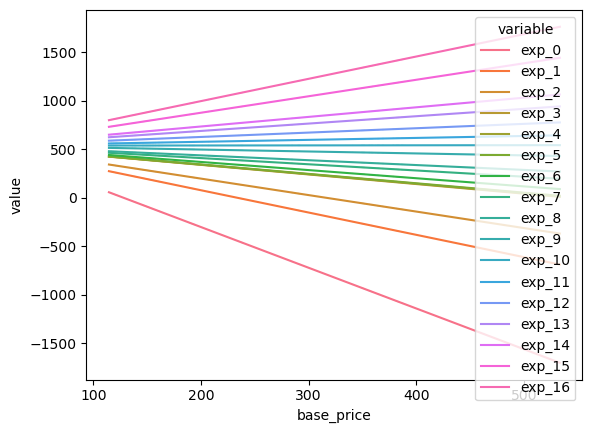

In [ ]:
sns.lineplot(x="base_price", y="value", hue="variable", data=pd.melt(test_predictions_samples.drop(["num_orders"], axis=1), ['base_price']))

In [ ]:
losses = []
for i, model in enumerate(models):
    losses.append(mean_squared_error(test_data_beverages["num_orders"], test_predictions_samples[f"exp_{i}"]))

In [ ]:
losses

[645311.1514756294,
 172218.51958759406,
 111915.59958404093,
 95801.83089575148,
 96002.53122266043,
 96215.11084999926,
 100059.66234452491,
 109894.52609335436,
 119606.2042198511,
 148257.28134607789,
 174674.40071464787,
 203089.73811623978,
 247011.9551968845,
 311786.7371500368,
 367222.49190805294,
 577991.4821304171,
 802791.772444456]

In [ ]:
coefs

[-4.2,
 -2.3,
 -1.7,
 -0.99,
 -0.98,
 -0.97,
 -0.84,
 -0.64,
 -0.5,
 -0.2,
 0.01,
 0.2,
 0.45,
 0.76,
 0.99,
 1.7,
 2.3]

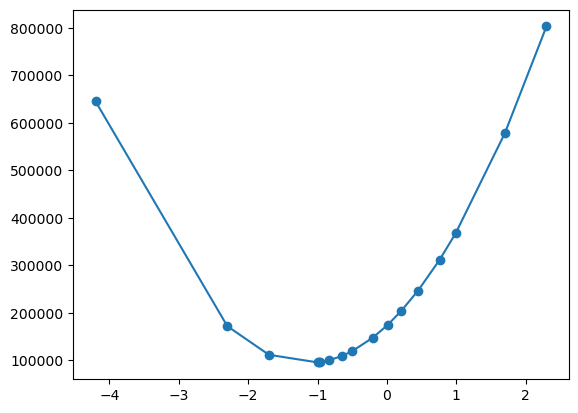

In [ ]:
plt.plot(np.array(coefs), np.array(losses), marker='o', label='MSE')

In [ ]:
from sklearn import preprocessing

X_train = deepcopy(x)
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_, scaler.scale_

(array([226.86952793]), array([103.64342599]))

In [ ]:
x

array([[152.29],
       [135.83],
       [135.86],
       ...,
       [367.63],
       [369.63],
       [355.99]])

In [ ]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.71957799],
       [-0.87839173],
       [-0.87810227],
       ...,
       [ 1.35812253],
       [ 1.37741946],
       [ 1.2458144 ]])

In [ ]:
model_scaled = LinearRegression().fit(X_scaled, y)

In [ ]:
model_scaled.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([-100.33476972]),
 'rank_': 1,
 'singular_': array([356.36077225]),
 'intercept_': np.float64(316.9106486184278)}

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([-0.96807654]),
 'rank_': 1,
 'singular_': array([36934.4513233]),
 'intercept_': np.float64(536.5377173336849)}

In [ ]:
test_data_beverages["prediction_normed"] = model_scaled.predict(test_data_beverages["base_price"].to_numpy().reshape(-1, 1))
mean_squared_error(test_data_beverages["num_orders"], test_data_beverages["prediction_normed"])

594200437.792271

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([-0.96807654]),
 'rank_': 1,
 'singular_': array([36934.4513233]),
 'intercept_': np.float64(536.5377173336849)}

In [ ]:
# add second feature
x = train_data_beverages[["base_price", "emailer_for_promotion"]].to_numpy()
y = train_data_beverages["num_orders"].to_numpy()

model = LinearRegression().fit(x, y)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 2,
 'coef_': array([ -0.9848209 , 165.24619166]),
 'rank_': 2,
 'singular_': array([36934.45151292,    78.52872345]),
 'intercept_': np.float64(531.8590335103213)}

In [ ]:
test_data_beverages["predictions"] = model.predict(test_data_beverages[["base_price", "emailer_for_promotion"]].to_numpy())
mean_squared_error(test_data_beverages["num_orders"], test_data_beverages["predictions"])

# before that: 96257.50

99182.99929421365